In [1]:
import theseus_growth as th
th = th.theseus()

In [2]:
x_data = [ 1, 3, 7, 14, 30, 60, 90, 180 ]
y_data = [ 80, 70, 55, 50, 30, 22, 10, 8 ]

facebook = th.create_profile( days = x_data, retention_values = y_data )

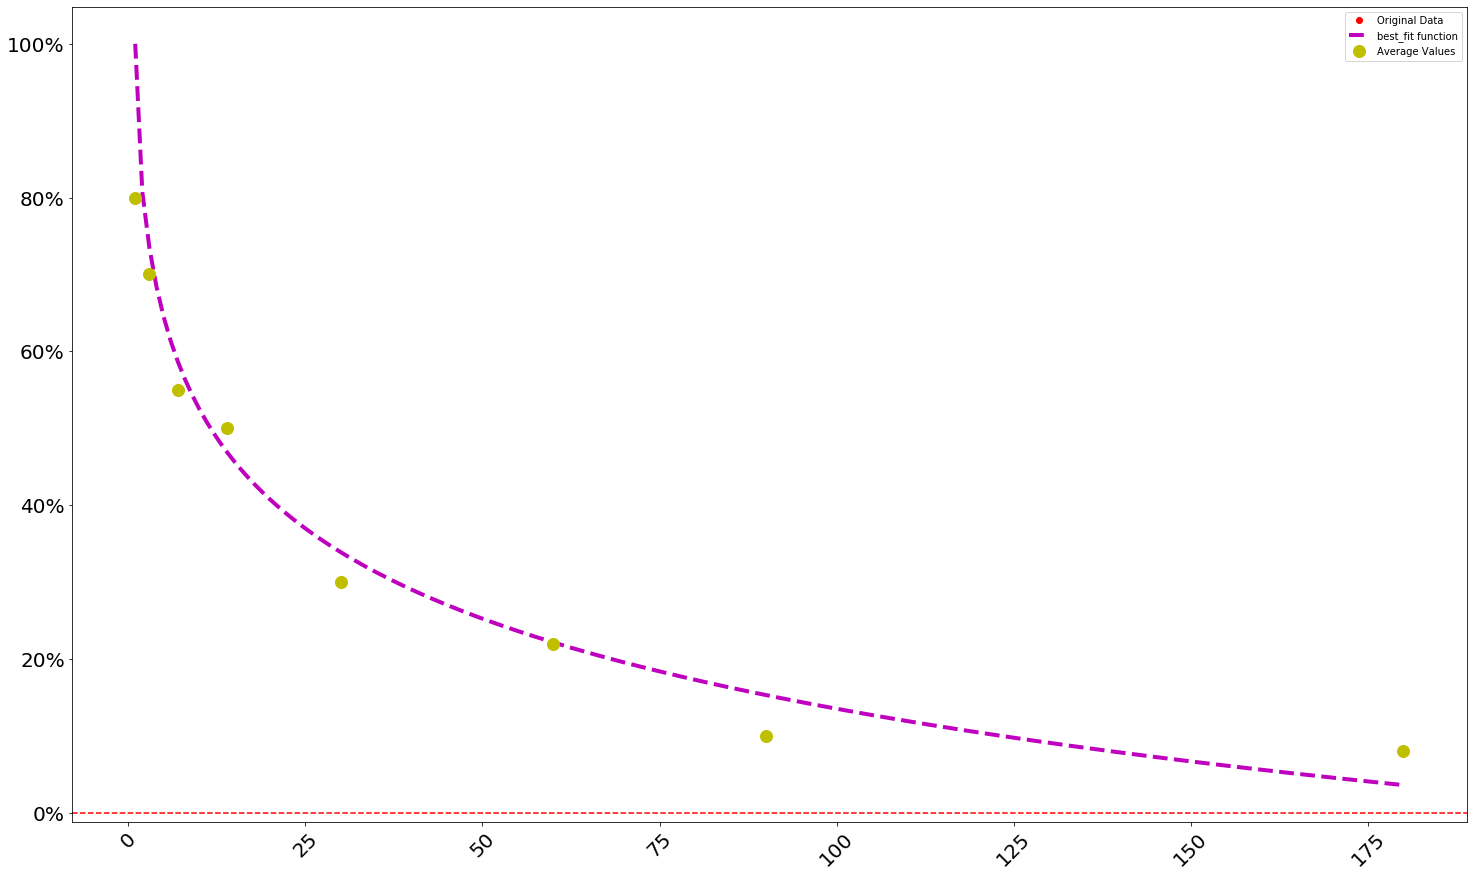

In [3]:
th.plot_retention( facebook )

In [4]:
#cohorts are daily new user values, eg. the number of new users
#joining the product on a given day
cohorts = [1000, 1000, 1000, 1000, 1000 ]

facebook_DAU = th.project_cohorted_DAU( profile = facebook, periods = 50, 
    cohorts = cohorts, start_date = 1 )

print( facebook_DAU )

                1     2     3     4     5    6    7    8    9   10  ...   41  \
cohort_date                                                         ...        
1            1000   807   734   684   645  613  587  564  543  525  ...  285   
2               0  1000   807   734   684  645  613  587  564  543  ...  290   
3               0     0  1000   807   734  684  645  613  587  564  ...  294   
4               0     0     0  1000   807  734  684  645  613  587  ...  298   
5               0     0     0     0  1000  807  734  684  645  613  ...  303   

              42   43   44   45   46   47   48   49   50  
cohort_date                                               
1            281  277  273  270  266  262  259  255  252  
2            285  281  277  273  270  266  262  259  255  
3            290  285  281  277  273  270  266  262  259  
4            294  290  285  281  277  273  270  266  262  
5            298  294  290  285  281  277  273  270  266  

[5 rows x 50 columns]


In [5]:
facebook_total = th.DAU_total( facebook_DAU )

print( facebook_total )

          1     2     3     4     5     6     7     8     9    10  ...    41  \
Value                                                              ...         
DAU    1000  1807  2541  3225  3870  3483  3263  3093  2952  2832  ...  1470   

         42    43    44    45    46    47    48    49    50  
Value                                                        
DAU    1448  1427  1406  1386  1367  1348  1330  1312  1294  

[1 rows x 50 columns]


In [6]:
facebook_DAU = th.project_cohorted_DAU( profile = facebook, periods = 50, cohorts = cohorts, 
    DAU_target = 10000, DAU_target_timeline = 10, start_date = 1 )

print( facebook_DAU )

                1     2     3     4     5     6     7     8     9    10  ...  \
cohort_date                                                              ...   
1            1000   807   734   684   645   613   587   564   543   525  ...   
2               0  1000   807   734   684   645   613   587   564   543  ...   
3               0     0  1000   807   734   684   645   613   587   564  ...   
4               0     0     0  1000   807   734   684   645   613   587  ...   
5               0     0     0     0  1000   807   734   684   645   613  ...   
6               0     0     0     0     0  1613  1302  1184  1103  1040  ...   
7               0     0     0     0     0     0  1757  1418  1290  1201  ...   
8               0     0     0     0     0     0     0  1853  1495  1361  ...   
9               0     0     0     0     0     0     0     0  1934  1561  ...   
10              0     0     0     0     0     0     0     0     0  2005  ...   

              41   42   43   44   45   

In [7]:
#get DNU from a DAU projection
facebook_DNU = th.get_DNU( facebook_DAU )
print( facebook_DNU )

       cohort_date       1       2       3       4       5       6       7  \
Value                                                                        
DNU           1000  1000.0  1000.0  1000.0  1000.0  1613.0  1757.0  1853.0   

            8       9  ...   41   42   43   44   45   46   47   48   49   50  
Value                  ...                                                    
DNU    1934.0  2005.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 51 columns]


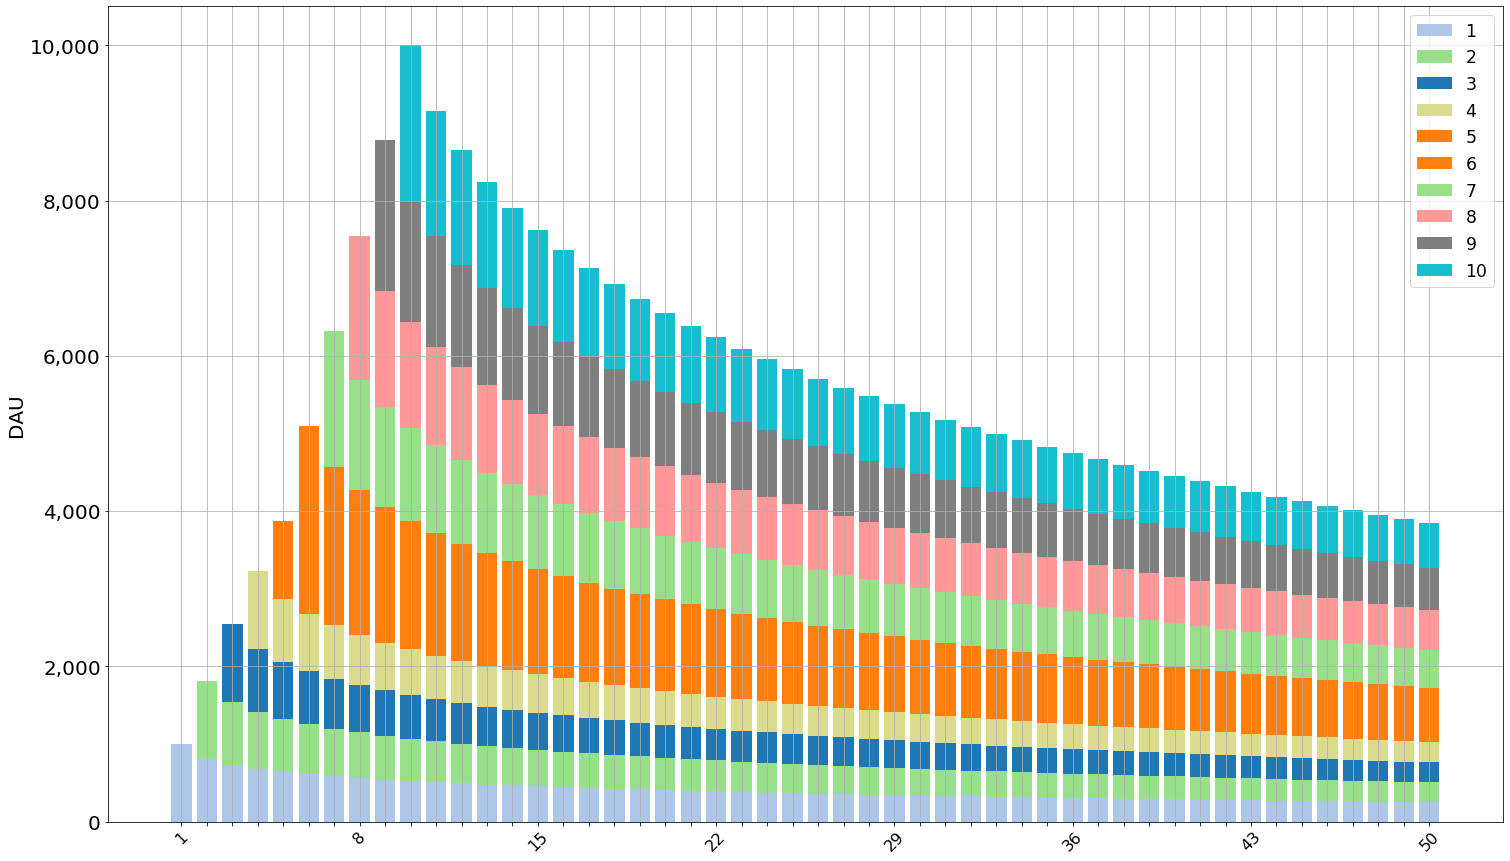

In [8]:
th.plot_forward_DAU_stacked( forward_DAU = facebook_DAU, 
    forward_DAU_labels = list( facebook_DAU.index ), 
    forward_DAU_dates = list( facebook_DAU.columns ), 
)

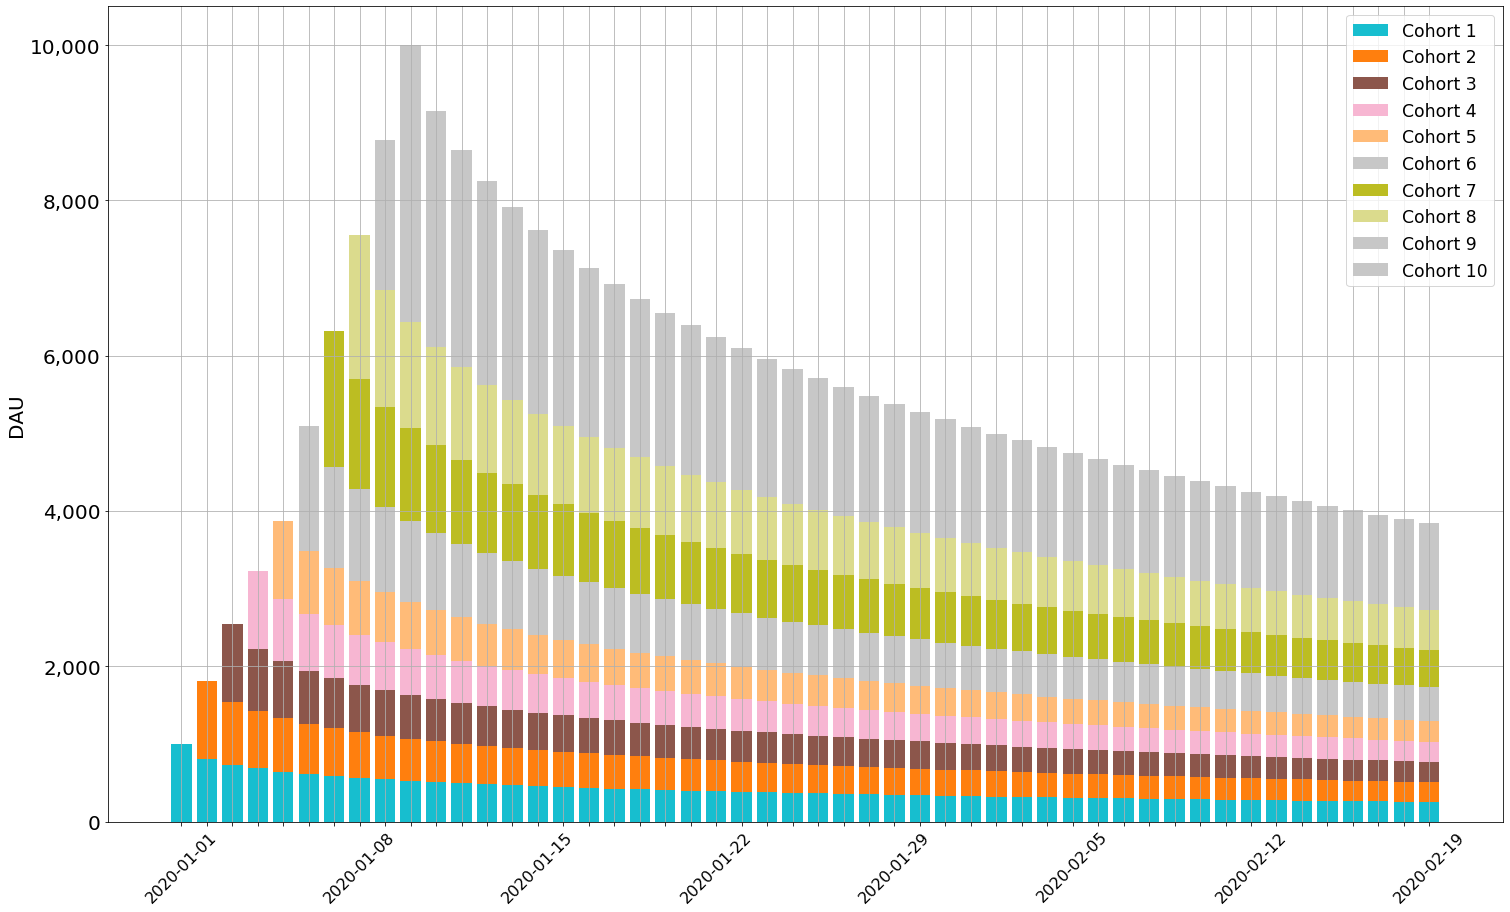

In [9]:
from datetime import date, timedelta
th.plot_forward_DAU_stacked( forward_DAU = facebook_DAU, 
    forward_DAU_labels = [ 'Cohort ' + str( x ) for x in list( facebook_DAU.index ) ], 
    forward_DAU_dates = [ date(2020, 1, 1) + timedelta(days=int( x ) - 1 ) for x in list( facebook_DAU.columns ) ]
)

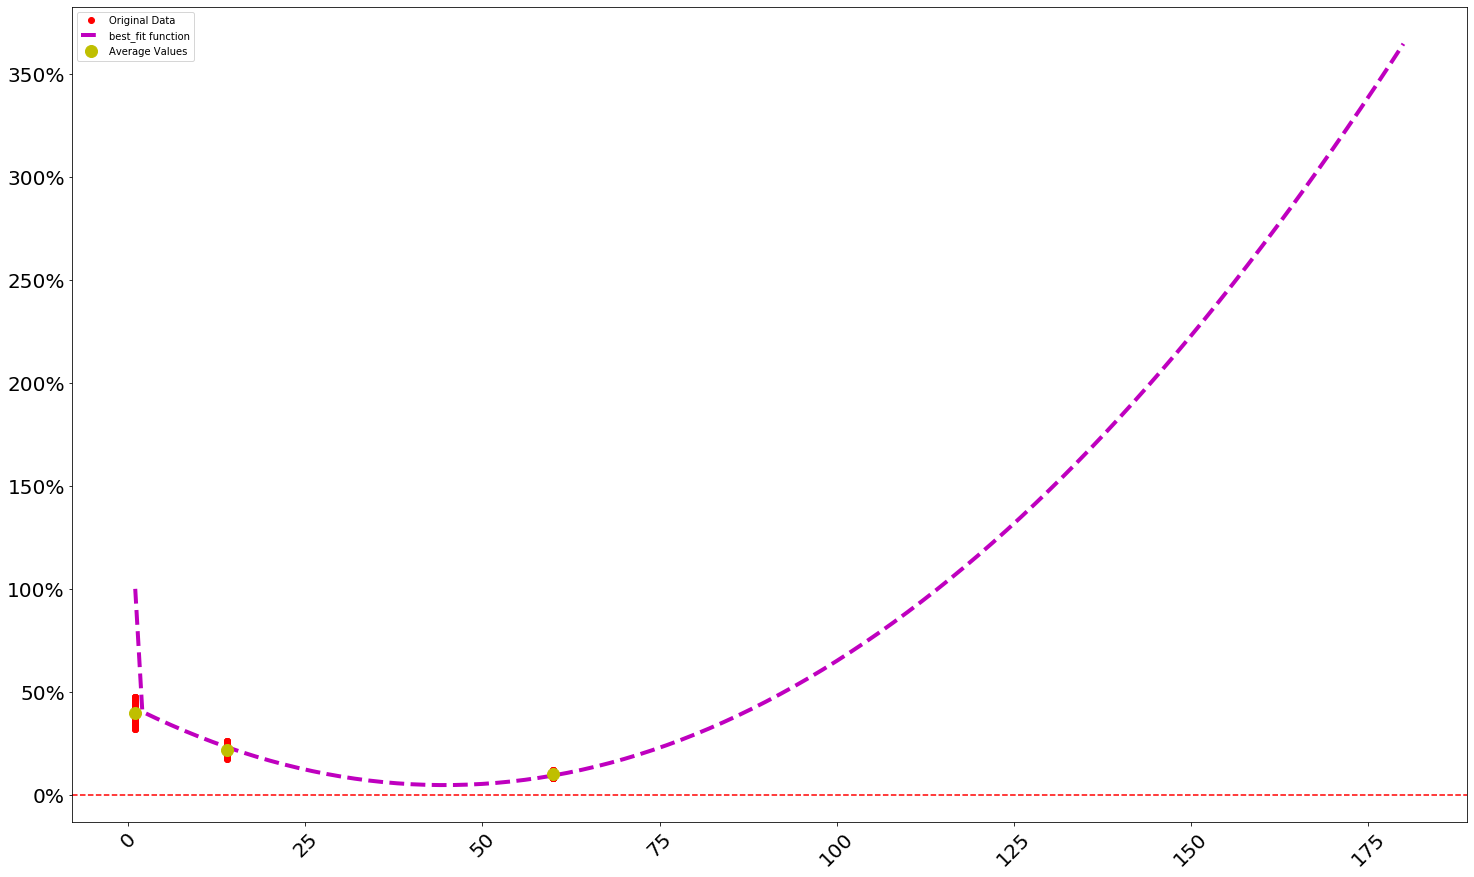

In [10]:
import numpy as np
import random

x_data = [ 1, 14, 60 ]
y_data = [ 40, 22, 15 ]

new_x = []
for i, x in enumerate( x_data ):
    this_x = x
    for z in np.arange( 1, 100 ):
        this_y = float( y_data[ i ] * ( 1 + ( random.randint( -20, 20 ) / 100 ) ) )
        y_data.append( this_y )
        new_x.append( this_x )
        
x_data.extend( new_x )

google = th.create_profile( days = x_data, retention_values = y_data, profile_max = 180 )

th.plot_retention( google )

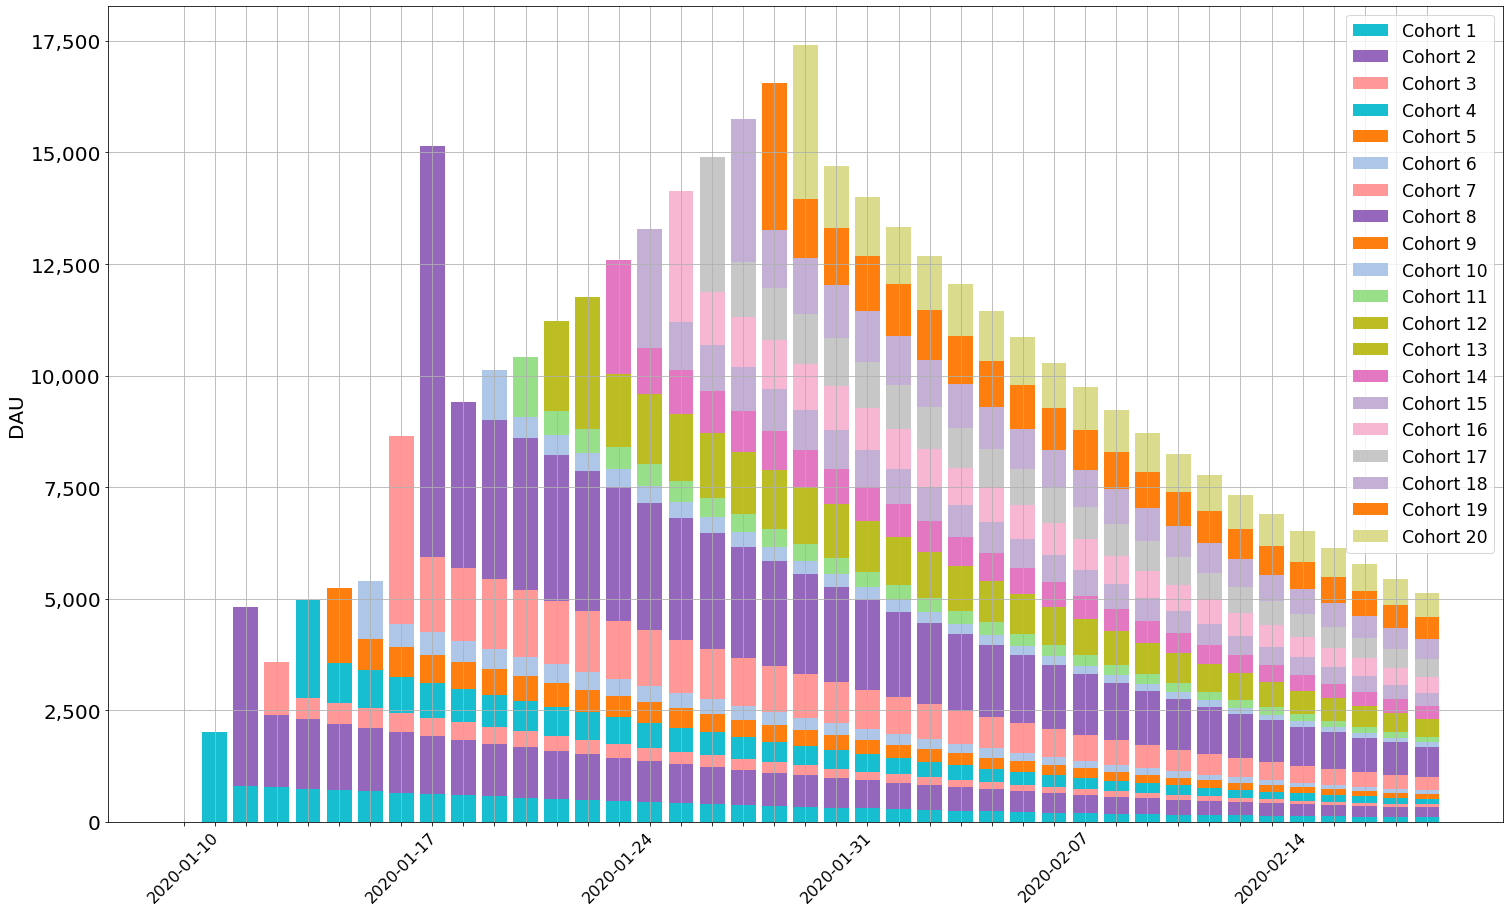

In [11]:
cohorts = [ 2000, 4000, 1200, 2200, 1700, 1300, 4200, 9200 ]
google_DAU = th.project_cohorted_DAU( profile = google, periods = 40, cohorts = cohorts, 
    DAU_target = 20000, DAU_target_timeline = 20, start_date = 10 )

from datetime import date, timedelta
th.plot_forward_DAU_stacked( forward_DAU = google_DAU, 
    forward_DAU_labels = [ 'Cohort ' + str( x ) for x in list( google_DAU.index ) ], 
    forward_DAU_dates = [ date(2020, 1, 1) + timedelta(days=int( x ) - 1 ) for x in list( google_DAU.columns ) ]
)

In [ ]:
google_total = th.DAU_total( google_DAU )

combined_DAU = th.combine_DAU( DAU_totals = [ facebook_total, google_total ], labels = [ "Facebook", "Google" ] )

th.plot_forward_DAU_stacked( forward_DAU = combined_DAU, 
    forward_DAU_labels = list( combined_DAU.index ), 
    forward_DAU_dates = [ date(2020, 1, 1) + timedelta(days=int( x ) - 1 ) for x in list( combined_DAU.columns ) ]
)

In [ ]:
x_data = [ 1, 14, 30, 90 ]
y_data = [ 25, 18, 12, 8 ]

#form options: 'log', 'exp', 'linear', 'quad', 'weibull', 'power'
snapchat = th.create_profile( days = x_data, retention_values = y_data, profile_max = 120 )

snapchat_aged_DAU = th.project_aged_DAU( snapchat, 20, [ 100, 200, 300, 400, 500 ], 
    start_date = 1, ages = [ 3, 7, 14 ] )

print( snapchat_aged_DAU )

In [ ]:
snapchat_exact_aged_DAU = th.project_exact_aged_DAU( snapchat, 20, [ 100, 200, 300, 400, 500 ], 
    start_date = 1, ages = [ 3, 7, 14 ] )

print( snapchat_exact_aged_DAU )

In [ ]:
snapchat_exact_aged_DAU = th.project_exact_aged_DAU( snapchat, 20, [ 100, 200, 300, 400, 500 ], 
    start_date = 1, ages = [ 1 ] )

print( snapchat_exact_aged_DAU )

In [ ]:
snapchat_DAU = th.project_cohorted_DAU( profile = snapchat, periods = 20, cohorts = [ 100, 200, 300, 400, 500 ], 
    start_date = 1 )

snapchat_total = th.DAU_total( snapchat_DAU )

combined_DAU = th.combine_DAU( DAU_totals = [ snapchat_aged_DAU, snapchat_total ], 
    labels = [ [ "Age " + str( x ) for x in list( snapchat_aged_DAU.index ) ], "Total" ] 
)

for x in list( snapchat_aged_DAU.index ):
    combined_DAU.loc[ 'Age ' + str( x ) + ' Pct' ] = combined_DAU.apply( lambda z: ( z[ 'Age ' + str( x )] / z[ 'Total' ] ) )

print( combined_DAU )